In [4]:
import os
import tarfile
from six.moves import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline




In [5]:
DOWNLOAD_ROOT = 'https://github.com/ageron/handson-ml/tree/master/'
HOUSING_PATH = "datasets/housing"
HOUSING_URL =  DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # fetch the data from housing_url
    urllib.request.urlretrieve(housing_url, tgz_path)
    # extract the tgz file
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


# fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()

# print(housing.head())
# print(housing.info())
# print(housing['ocean_proximity'].value_counts())
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

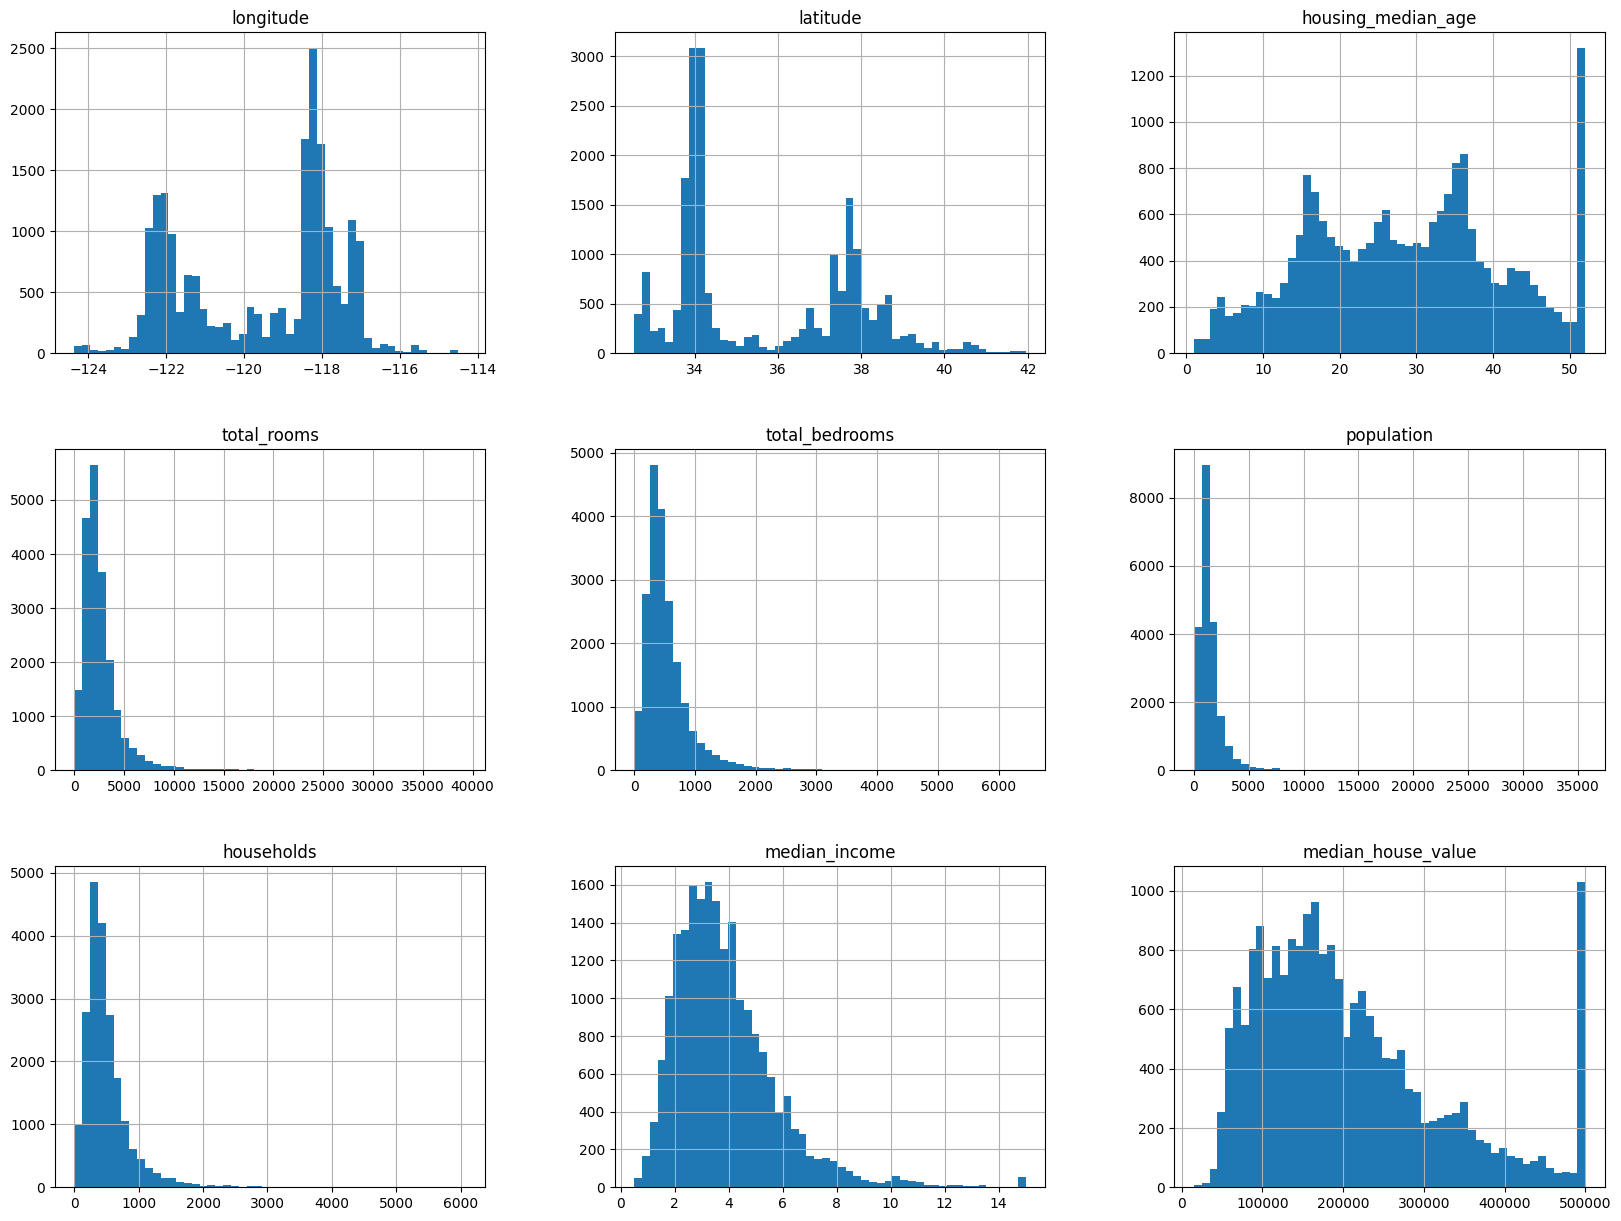

In [7]:
housing.hist(bins=50, figsize=(20, 15))
# plt.show()

In [8]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))


16512


In [10]:
# print(housing['median_income'].value_counts())
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
# print(housing['income_cat'].value_counts() / len(housing))
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)
    
print(strat_train_set.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   

      ocean_proximity  
12655          INLAND  
15502      NEAR OCEAN  
2908           INLAND  
14053      NEAR OCEA

C:\Users\Polygon\AppData\Local\Temp\ipykernel_27528\1015102900.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)


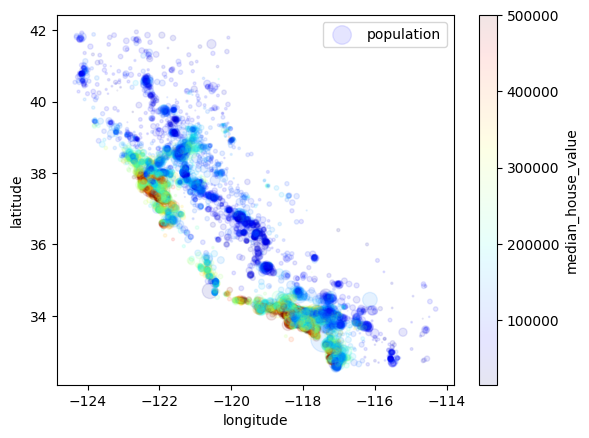

In [11]:
copy_strat_train_set = strat_train_set.copy()
copy_strat_train_set.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1
                          , s=copy_strat_train_set['population']/100, label="population"
                          , c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

Discover and Visualize the Data to Gain Insights

In [12]:
copy_strat_train_set.drop('ocean_proximity', axis=1, inplace=True)
corr_matrix = copy_strat_train_set.corr()

print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


In [13]:
copy_strat_train_set["rooms_per_household"] = copy_strat_train_set['total_rooms'] / copy_strat_train_set['households']
copy_strat_train_set["bedrooms_per_room"] = copy_strat_train_set['total_bedrooms'] / copy_strat_train_set['total_rooms']
copy_strat_train_set['population_per_household'] = copy_strat_train_set['population'] / copy_strat_train_set['households']

corr_matrix = copy_strat_train_set.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64


Making New Features

Data Prepare    


In [14]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

Data Cleaning
    - Get rid of the corresponding districts.
    - Get rid of the whole attribute.
    - Set the values to some value (zero, the mean, the median, etc.).

In [15]:
# housing.dropna(subset=['total_bedrooms']) #option 1 remove row
# housing.drop("total_bedrooms", axis=1)  # option 2 remove column
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median)  # option 3 


# using sklearn
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop("ocean_proximity", axis=1)
# print(housing_num)
imputer.fit(housing_num)

X = imputer.transform(housing_num)

print(housing_num.median().values)


[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


Handling Text and Categorical Attributes

In [ ]:
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(encoder.classes_)

# One-hot Encoder
encoder = OneHotEncoder()
housing_cat_onehot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
print(housing_cat_onehot.toarray())

# LabelBinarizer
encoder = LabelBinarizer()
housing_cat_onehot = encoder.fit_transform(housing_cat)
print(housing_cat_onehot)

# Standard Scaling
encoder = StandardScaler()
housing_standardi = encoder.fit_transform(housing_cat_onehot)


[1 4 1 ... 0 0 1]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


AttributeError: 'numpy.ndarray' object has no attribute 'head'

Transform Pipeline


In [ ]:
num_attribs = list(housing_num)
print(num_attribs)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [ ]:
import zlib

# Example large number as a string
large_number = '1' * 210000  # A number with 210,000 digits

# Compress the number
compressed_data = zlib.compress(large_number.encode('utf-8'))

# Check the length of the compressed data
print(f'Original length: {len(large_number)}')
print(compressed_data)
print(f'Compressed length: {len(compressed_data)}')

Original length: 210000
b'x\x9c\xed\xc1\x81\x00\x00\x00\x00\xc3 \xa6\xf9\xcb\x1d\xe4U\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf0h\xa9\xf2\x0c\x84'
Compressed length: 226
